In [9]:
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
from cliffs_delta import cliffs_delta

In [2]:
# load data
final = pickle.load(open( '../00_data/final/incorrect_answers.pkl','rb') )

# split by interventiongroup
intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]

Check assumptions

In [ ]:
# Levenes homogeneity 
stats.levene(intvcontrol['prop_fehler'], intv2['prop_fehler'], intv3['prop_fehler'], intv4['prop_fehler'], intv5['prop_fehler'], intv6['prop_fehler'])

In [3]:
# Shapiro-Wilk test for normality => normality = not significant // significant = no normality
print(stats.shapiro(intvcontrol['prop_fehler']))
print(stats.shapiro(intv2['prop_fehler']))
print(stats.shapiro(intv3['prop_fehler']))
print(stats.shapiro(intv4['prop_fehler']))
print(stats.shapiro(intv5['prop_fehler']))
print(stats.shapiro(intv6['prop_fehler']))

ShapiroResult(statistic=0.7264866232872009, pvalue=0.0)
ShapiroResult(statistic=0.5711383819580078, pvalue=0.0)
ShapiroResult(statistic=0.7002403736114502, pvalue=0.0)
ShapiroResult(statistic=0.742385745048523, pvalue=0.0)
ShapiroResult(statistic=0.7237004041671753, pvalue=0.0)
ShapiroResult(statistic=0.7595332860946655, pvalue=1.1210387714598537e-44)


In [ ]:
# plot histogram
sns.histplot(data=final, x="prop_fehler")

Get Mean and Median

In [25]:
# get mean by interventiongroup
prop_fehler_by_group = final.groupby(['interventiongroup']).agg({'prop_fehler':'mean','Geschlecht':'count'})
prop_fehler_by_group = prop_fehler_by_group.rename(columns={'Geschlecht':'count'})
prop_fehler_by_group

,prop_fehler,count
interventiongroup,,
2,13.907045,1835
3,14.320649,1929
4,14.770887,1910
5,14.703413,1818
6,10.918539,1733
control,16.986885,2447


In [26]:
# get median by interventiongroup
prop_fehler_by_group = final.groupby(['interventiongroup']).agg({'prop_fehler':'median','Geschlecht':'count'})
prop_fehler_by_group = prop_fehler_by_group.rename(columns={'Geschlecht':'count'})
prop_fehler_by_group

,prop_fehler,count
interventiongroup,,
2,10.00,1835
3,10.00,1929
4,10.50,1910
5,9.00,1818
6,7.95,1733
control,12.00,2447


In [59]:
# get median by interventiongroup and gender
prop_fehler_by_group = final.groupby(['Geschlecht','interventiongroup']).agg({'prop_fehler':'mean','Klassenstufe':'count'}) #mean
prop_fehler_by_group = prop_fehler_by_group.rename(columns={'Klassenstufe':'count'})
prop_fehler_by_group

prop_fehler  count
Geschlecht interventiongroup                    
d          2                    12.564092     50
           3                    12.128556     66
           4                    14.475982     57
           5                    12.573389     68
           6                    11.242632     73
           control              19.023340     79
m          2                    14.703146    864
           3                    14.529031    883
           4                    16.051714    935
           5                    15.113515    874
           6                    11.328756    830
           control              17.392092   1165
w          2                    13.233121    921
           3                    14.280524    980
           4                    13.484653    918
           5                    14.459592    876
           6                    10.479817    830
           control              16.460744   1203

In [ ]:
# get median by interventiongroup and class level
prop_fehler_by_group = final.groupby(['Klassenstufe','interventiongroup']).agg({'prop_fehler':'median','Geschlecht':'count'}) #mean
prop_fehler_by_group = prop_fehler_by_group.rename(columns={'Geschlecht':'count'})

Check significance

In [ ]:
# Kruskal Wallis Test 
stats.kruskal(intvcontrol['prop_fehler'], intv2['prop_fehler'], intv3['prop_fehler'],intv4['prop_fehler'],intv5['prop_fehler'],intv6['prop_fehler'])

Wilcoxon Mann Whitney Tests and Cliffs Delta (# thresholds: .11 (small), .28 (medium), .43 (large))

In [34]:
# control group
groups = [intv2, intv3, intv4, intv5, intv6]
for x in groups:
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], x['prop_fehler']))
    print(cliffs_delta(intvcontrol['prop_fehler'], x['prop_fehler'])[0])

MannwhitneyuResult(statistic=2522807.0, pvalue=3.996059053380393e-12)
0.12368345157112808
MannwhitneyuResult(statistic=2642869.5, pvalue=9.426761013919426e-12)
0.11979756212736452
MannwhitneyuResult(statistic=2565388.0, pvalue=2.90512710702606e-08)
0.09778102046099829
MannwhitneyuResult(statistic=2514632.0, pvalue=2.8526073483274315e-13)
0.13051566701418812
MannwhitneyuResult(statistic=2643115.0, pvalue=3.85541934504446e-42)
0.24656096434250308


In [35]:
# Intv 2
groups = [intv3, intv4, intv5, intv6]
for x in groups:
    print(stats.mannwhitneyu(intv2['prop_fehler'], x['prop_fehler']))
    print(cliffs_delta(intv2['prop_fehler'], x['prop_fehler'])[0])

MannwhitneyuResult(statistic=1764774.5, pvalue=0.8787604495763326)
-0.0028719826313700395
MannwhitneyuResult(statistic=1708552.5, pvalue=0.18464052148148724)
-0.025035308215758164
MannwhitneyuResult(statistic=1690305.0, pvalue=0.48424264889369495)
0.013363189179953418
MannwhitneyuResult(statistic=1785229.0, pvalue=2.1726372229006505e-10)
0.12276611568038917


In [36]:
# Intv 3
groups = [intv4, intv5, intv6]
for x in groups:
    print(stats.mannwhitneyu(intv3['prop_fehler'], x['prop_fehler']))
    print(cliffs_delta(intv3['prop_fehler'], x['prop_fehler'])[0])

MannwhitneyuResult(statistic=1803431.0, pvalue=0.25883850741793)
-0.021042289225624865
MannwhitneyuResult(statistic=1781158.0, pvalue=0.40256865225935645)
0.01579561792363788
MannwhitneyuResult(statistic=1881121.5, pvalue=5.229399986314714e-11)
0.12542368926671807


In [45]:
# Intv 4
print(stats.mannwhitneyu(intv4['prop_fehler'], intv5['prop_fehler']))
print(cliffs_delta(intv4['prop_fehler'], intv5['prop_fehler'])[0])
print(stats.mannwhitneyu(intv4['prop_fehler'], intv6['prop_fehler']))
print(cliffs_delta(intv4['prop_fehler'], intv6['prop_fehler'])[0])

MannwhitneyuResult(statistic=1800550.5, pvalue=0.05003244508511461)
0.037069963540856704
MannwhitneyuResult(statistic=1897595.5, pvalue=1.9628830739446235e-14)
0.14657299178557295


In [46]:
# Intv 5
print(stats.mannwhitneyu(intv5['prop_fehler'], intv6['prop_fehler']))
print(cliffs_delta(intv5['prop_fehler'], intv6['prop_fehler'])[0])

MannwhitneyuResult(statistic=1737680.5, pvalue=1.0450411364582877e-07)
0.10308119675210452


Boxplots

[Text(0.5, 0, 'Incorrect answers')]

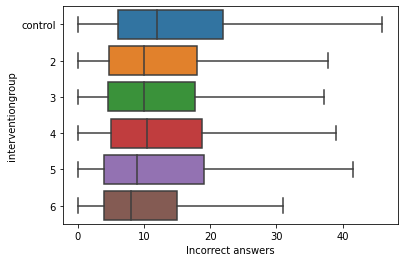

In [62]:
# boxplot by interventiongroup
t=sns.boxplot(data=final, x="prop_fehler", y="interventiongroup",showfliers = False, order=["control", "2",'3','4','5','6'])#,hue='Geschlecht'
t.set(xlabel ="Incorrect answers")

In [ ]:
# boxplot by interventiongroup and gender
sns.boxplot(data=final, x="prop_fehler", hue="interventiongroup",y='Geschlecht',showfliers = False)

Gender Demographics

In [40]:
# split by gender
final_m = final.loc[final.Geschlecht == 'm']
final_w = final.loc[final.Geschlecht == 'w']
final_d = final.loc[final.Geschlecht == 'd']

Boys

In [41]:
# split by interventiongroup
intvcontrol_m = final_m[(final_m['interventiongroup']=='control')]
intv2_m = final_m[(final_m['interventiongroup']=='2')]
intv3_m = final_m[(final_m['interventiongroup']=='3')]
intv4_m = final_m[(final_m['interventiongroup']=='4')]
intv5_m = final_m[(final_m['interventiongroup']=='5')]
intv6_m = final_m[(final_m['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_m['prop_fehler'], intv2_m['prop_fehler'], intv3_m['prop_fehler'],intv4_m['prop_fehler'],intv5_m['prop_fehler'],intv6_m['prop_fehler'])

KruskalResult(statistic=88.8980806718587, pvalue=1.1448700947751413e-17)

In [42]:
# control group
groups = [intv2_m, intv3_m, intv4_m, intv5_m, intv6_m]
for x in groups:
    print(stats.mannwhitneyu(intvcontrol_m['prop_fehler'], x['prop_fehler']))
    print(cliffs_delta(intvcontrol_m['prop_fehler'], x['prop_fehler'])[0])


MannwhitneyuResult(statistic=567961.5, pvalue=7.138959799153062e-07)
0.1285199093943729
MannwhitneyuResult(statistic=582520.0, pvalue=2.6811687910437267e-07)
0.13254171547446036
MannwhitneyuResult(statistic=585011.5, pvalue=0.0034566278337886933)
0.0741300406233504
MannwhitneyuResult(statistic=570249.5, pvalue=3.349344269639201e-06)
0.12010194360691802
MannwhitneyuResult(statistic=600697.5, pvalue=2.3613000342151007e-20)
0.242458244997156


In [43]:
# Intv 2
groups = [intv3_m, intv4_m, intv5_m, intv6_m]
for x in groups:
    print(stats.mannwhitneyu(intvcontrol_m['prop_fehler'], x['prop_fehler']))
    print(cliffs_delta(intvcontrol_m['prop_fehler'], x['prop_fehler'])[0])

MannwhitneyuResult(statistic=582520.0, pvalue=2.6811687910437267e-07)
0.13254171547446036
MannwhitneyuResult(statistic=585011.5, pvalue=0.0034566278337886933)
0.0741300406233504
MannwhitneyuResult(statistic=570249.5, pvalue=3.349344269639201e-06)
0.12010194360691802
MannwhitneyuResult(statistic=600697.5, pvalue=2.3613000342151007e-20)
0.242458244997156


In [44]:
# Intv 3
groups = [intv4_m, intv5_m, intv6_m]
for x in groups:
    print(stats.mannwhitneyu(intv3_m['prop_fehler'], x['prop_fehler']))
    print(cliffs_delta(intv3_m['prop_fehler'], x['prop_fehler'])[0])

MannwhitneyuResult(statistic=389405.5, pvalue=0.03645379982102506)
-0.05667843581373659
MannwhitneyuResult(statistic=382174.0, pvalue=0.7280454214217346)
-0.009580922121641688
MannwhitneyuResult(statistic=404343.5, pvalue=0.00021138968566857444)
0.10342206879613584


In [47]:
# Intv 4
print(stats.mannwhitneyu(intv4_m['prop_fehler'], intv5_m['prop_fehler']))
print(cliffs_delta(intv4_m['prop_fehler'], intv5_m['prop_fehler'])[0])
print(stats.mannwhitneyu(intv4_m['prop_fehler'], intv6_m['prop_fehler']))
print(cliffs_delta(intv4_m['prop_fehler'], intv6_m['prop_fehler'])[0])

MannwhitneyuResult(statistic=428127.0, pvalue=0.07847652115410986)
0.04780283654963962
MannwhitneyuResult(statistic=451168.0, pvalue=3.4282590336815567e-09)
0.16272920559242318


In [48]:
# Intv 5
print(stats.mannwhitneyu(intv5_m['prop_fehler'], intv6_m['prop_fehler']))
print(cliffs_delta(intv5_m['prop_fehler'], intv6_m['prop_fehler'])[0])

MannwhitneyuResult(statistic=402503.5, pvalue=8.834312493159594e-05)
0.10971161534007885


In [ ]:
# boxplot by prop fehler and interventiongroup
sns.boxplot(data=final_m, x="prop_fehler", y="interventiongroup",showfliers = False)

Girls

In [50]:
# split by interventiongroup
intvcontrol_w = final_w[(final_w['interventiongroup']=='control')]
intv2_w = final_w[(final_w['interventiongroup']=='2')]
intv3_w = final_w[(final_w['interventiongroup']=='3')]
intv4_w = final_w[(final_w['interventiongroup']=='4')]
intv5_w = final_w[(final_w['interventiongroup']=='5')]
intv6_w = final_w[(final_w['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_w['prop_fehler'], intv2_w['prop_fehler'], intv3_w['prop_fehler'],intv4_w['prop_fehler'],intv5_w['prop_fehler'],intv6_w['prop_fehler'])


KruskalResult(statistic=97.91293918250327, pvalue=1.4547609801609048e-19)

In [51]:
# control group
groups = [intv2_w, intv3_w, intv4_w, intv5_w, intv6_w]
for x in groups:
    print(stats.mannwhitneyu(intvcontrol_w['prop_fehler'], x['prop_fehler']))
    print(cliffs_delta(intvcontrol_w['prop_fehler'], x['prop_fehler'])[0])


MannwhitneyuResult(statistic=619535.5, pvalue=2.860894795184369e-06)
0.11833247139119267
MannwhitneyuResult(statistic=649666.0, pvalue=3.957281635059926e-05)
0.1021188525285426
MannwhitneyuResult(statistic=623058.0, pvalue=3.919004386692723e-07)
0.1283664477151348
MannwhitneyuResult(statistic=599913.5, pvalue=6.590231295567846e-08)
0.13854158363603927
MannwhitneyuResult(statistic=625222.5, pvalue=3.4921421403431483e-22)
0.25233602740137606


In [52]:
# Intv 2
groups = [intv3_w, intv4_w, intv5_w, intv6_w]
for x in groups:
    print(stats.mannwhitneyu(intvcontrol_w['prop_fehler'], x['prop_fehler']))
    print(cliffs_delta(intvcontrol_w['prop_fehler'], x['prop_fehler'])[0])

MannwhitneyuResult(statistic=649666.0, pvalue=3.957281635059926e-05)
0.1021188525285426
MannwhitneyuResult(statistic=623058.0, pvalue=3.919004386692723e-07)
0.1283664477151348
MannwhitneyuResult(statistic=599913.5, pvalue=6.590231295567846e-08)
0.13854158363603927
MannwhitneyuResult(statistic=625222.5, pvalue=3.4921421403431483e-22)
0.25233602740137606


In [53]:
# Intv 3
groups = [intv4_w, intv5_w, intv6_w]
for x in groups:
    print(stats.mannwhitneyu(intv3_w['prop_fehler'], x['prop_fehler']))
    print(cliffs_delta(intv3_w['prop_fehler'], x['prop_fehler'])[0])

MannwhitneyuResult(statistic=462610.0, pvalue=0.28368520511723105)
0.028433595660486418
MannwhitneyuResult(statistic=448395.0, pvalue=0.09648004104048934)
0.04462538440033548
MannwhitneyuResult(statistic=469463.5, pvalue=1.4618492981498816e-08)
0.15432382591590854


In [54]:
# Intv 4
print(stats.mannwhitneyu(intv4_w['prop_fehler'], intv5_w['prop_fehler']))
print(cliffs_delta(intv4_w['prop_fehler'], intv5_w['prop_fehler'])[0])
print(stats.mannwhitneyu(intv4_w['prop_fehler'], intv6_w['prop_fehler']))
print(cliffs_delta(intv4_w['prop_fehler'], intv6_w['prop_fehler'])[0])

MannwhitneyuResult(statistic=409425.0, pvalue=0.5032195805413758)
0.01825737905512281
MannwhitneyuResult(statistic=428264.5, pvalue=7.156642595483996e-06)
0.12414232091765756


In [55]:
# Intv 5
print(stats.mannwhitneyu(intv5_w['prop_fehler'], intv6_w['prop_fehler']))
print(cliffs_delta(intv5_w['prop_fehler'], intv6_w['prop_fehler'])[0])

MannwhitneyuResult(statistic=400213.0, pvalue=0.00030988260024271814)
0.10087748253287121


In [ ]:
# boxplot prop fehler / interventiongroup
sns.boxplot(data=final_w, x="prop_fehler", y="interventiongroup",showfliers = False)

Demographics Klassenstufe

In [56]:
# split by class level
final_5 = final.loc[final.Klassenstufe == '5']
final_6 = final.loc[final.Klassenstufe == '6']
final_7 = final.loc[final.Klassenstufe == '7']
final_8 = final.loc[final.Klassenstufe == '8']
final_9 = final.loc[final.Klassenstufe == '9']
final_10 = final.loc[final.Klassenstufe == '10']
final_11 = final.loc[final.Klassenstufe == '11']
final_12 = final.loc[final.Klassenstufe == '12']
final_13 = final.loc[final.Klassenstufe == '13']

klassenliste = [final_5, final_6, final_7, final_8, final_9, final_10, final_11, final_12, final_13]

for x in klassenliste:
    intvcontrol = x[(x['interventiongroup']=='control')]
    intv2 = x[(x['interventiongroup']=='2')]
    intv3 = x[(x['interventiongroup']=='3')]
    intv4 = x[(x['interventiongroup']=='4')]
    intv5 = x[(x['interventiongroup']=='5')]
    intv6 = x[(x['interventiongroup']=='6')]

    # Kruskal Wallis Test 
    print(stats.kruskal(intvcontrol['prop_fehler'], intv2['prop_fehler'], intv3['prop_fehler'],intv4['prop_fehler'],intv5['prop_fehler'],intv6['prop_fehler']))


KruskalResult(statistic=26.127963665169766, pvalue=8.427837475942187e-05)
KruskalResult(statistic=23.47320522882372, pvalue=0.000274019809230039)
KruskalResult(statistic=25.66662982035462, pvalue=0.0001035493201221223)
KruskalResult(statistic=34.41197796481034, pvalue=1.971069615549076e-06)
KruskalResult(statistic=53.29660894383976, pvalue=2.923247214428506e-10)
KruskalResult(statistic=20.775392558934005, pvalue=0.0008931417002862665)
KruskalResult(statistic=22.673153497336557, pvalue=0.0003897501992315538)
KruskalResult(statistic=6.966921996029361, pvalue=0.2231120086768867)
KruskalResult(statistic=7.9781298510754945, pvalue=0.15744506029104643)


In [ ]:
# carry out wilcoxon mann whitney test for significant class levels

klassenliste = [final_5, final_6, final_7, final_8, final_9, final_10, final_11]

for x in klassenliste:
    intvcontrol = x[(x['interventiongroup']=='control')]
    intv2 = x[(x['interventiongroup']=='2')]
    intv3 = x[(x['interventiongroup']=='3')]
    intv4 = x[(x['interventiongroup']=='4')]
    intv5 = x[(x['interventiongroup']=='5')]
    intv6 = x[(x['interventiongroup']=='6')]

    #Wilcoxon Mann Whitney Test
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv2['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv3['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv4['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv5['prop_fehler']))
    print(stats.mannwhitneyu(intvcontrol['prop_fehler'], intv6['prop_fehler']))
    print('--------------')

In [ ]:
# Boxplot 

In [ ]:
# print(sns.boxplot(data=final_5, x="prop_fehler", y="interventiongroup",showfliers = False))

In [ ]:
# print(sns.boxplot(data=final_8, x="prop_fehler", y="interventiongroup",showfliers = False))

In [ ]:
# print(sns.boxplot(data=final_9, x="prop_fehler", y="interventiongroup",showfliers = False))